<a href="https://colab.research.google.com/github/artaasadi/NeuralNetwork_proj/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt

# Loading Data
after importing packages the needed data are gotten from google drive

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
cd drive/'My Drive'/'Colab Notebooks'/AI_Project_Files

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/AI_Project_Files'
/content/drive/My Drive/Colab Notebooks/AI_Project_Files


getting data from pkl file and reshaping them to 102
then shuffling them

In [63]:
# loading training set features
f = open("Datasets/train_set_features.pkl", "rb")
train_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length 
features_STDs = np.std(a=train_set_features2, axis=0)
train_set_features = train_set_features2[:, features_STDs > 52.3]

# changing the range of data between 0 and 1
train_set_features = np.divide(train_set_features, train_set_features.max())

# loading training set labels
f = open("Datasets/train_set_labels.pkl", "rb")
train_set_labels = pickle.load(f)
f.close()

# ------------
# loading test set features
f = open("Datasets/test_set_features.pkl", "rb")
test_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length 
features_STDs = np.std(a=test_set_features2, axis=0)
test_set_features = test_set_features2[:, features_STDs > 48]

# changing the range of data between 0 and 1
test_set_features = np.divide(test_set_features, test_set_features.max())

# loading test set labels
f = open("Datasets/test_set_labels.pkl", "rb")
test_set_labels = pickle.load(f)
f.close()

# ------------
# preparing our training and test sets - joining datasets and lables
train_set = []
test_set = []

for i in range(len(train_set_features)):
    label = np.array([0,0,0,0])
    label[int(train_set_labels[i])] = 1
    label = label.reshape(4,1)
    train_set.append((train_set_features[i].reshape(102,1), label))
    

for i in range(len(test_set_features)):
    label = np.array([0,0,0,0])
    label[int(test_set_labels[i])] = 1
    label = label.reshape(4,1)
    test_set.append((test_set_features[i].reshape(102,1), label))

# shuffle
random.shuffle(train_set)
random.shuffle(test_set)

# print size
print(len(train_set)) #1962
print(len(test_set)) #662

1962
662


defining weights by normal distribution and defining biases by zero

In [6]:
W1 = np.random.normal(0, 1.0, [150, 102])
W2 = np.random.normal(0, 1.0, [60, 150])
W3 = np.random.normal(0, 1.0, [4, 60])
b1 = np.zeros([150,1])
b2 = np.zeros([60,1])
b3 = np.zeros([4,1])

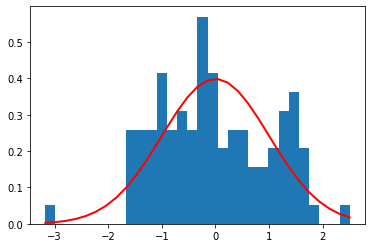

In [64]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(W1[0], 30, density=True)
plt.plot(bins, 1/(np.sqrt(2 * np.pi)) *
               np.exp( - (bins)**2 / 2 ),
         linewidth=2, color='r')
plt.show()

changed lists to np array to work easier

In [65]:
train_set200 = np.array(random.sample(train_set, 200))
test_set200 = np.array(random.sample(test_set, 200))
train_set = np.array(train_set)
test_set = np.array(test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify '

# FeedForward
while the weights are settled by normal distribution and we have 4 labels the accuracy is usualy near to 0.25

In [ ]:
def sigmoid(x) :
  return 1/(1 + np.exp(-x))

counter = 0
for sample in train_set200 :
  a1 = sigmoid(W1 @ sample[0] + b1)
  a2 = sigmoid(W2 @ a1 + b2)
  a3 = sigmoid(W3 @ a2 + b3)
  if (np.argmax(a3) == np.argmax(sample[1])) :
    counter += 1
accuracy = (counter/200)
print(accuracy)

0.175


# BackPropagation


In [ ]:
def sigmoid(x) :
  return 1/(1 + np.exp(-x))

learning_rate = 1
epochs_num = 20
batch_size = 10
cost_list = []
accuracy_list = []
for epoch in range(0, epochs_num) :
  np.random.shuffle(train_set200)
  batches = np.array_split(train_set200, 200//batch_size)
  cost = 0
  accuracy = 0
  for batch in batches :
    W1_grad = np.zeros([150, 102])
    W2_grad = np.zeros([60, 150])
    W3_grad = np.zeros([4, 60])
    b1_grad = np.zeros([150, 1])
    b2_grad = np.zeros([60, 1])
    b3_grad = np.zeros([4, 1])
    for sample, label in batch :
      a1 = sigmoid(W1 @ sample + b1)
      a2 = sigmoid(W2 @ a1 + b2)
      a3 = sigmoid(W3 @ a2 + b3)
      cost += np.sum(np.power((a3-label),2))
      if (np.argmax(a3) == np.argmax(label)) :
        accuracy += 1


      for j in range(W3_grad.shape[0]):
        for k in range(W3_grad.shape[1]):
          W3_grad[j, k] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]
            
      for j in range(b3_grad.shape[0]):
        b3_grad[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0])
            

      a2_grad = np.zeros((W3_grad.shape[1], 1))
      for k in range(W3_grad.shape[1]):
        for j in range(W3_grad.shape[0]):
          a2_grad[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * W3[j, k]
            
      for k in range(W2_grad.shape[0]):
        for m in range(W2_grad.shape[1]):
          W2_grad[k, m] += a2_grad[k, 0] * a2[k,0] * (1 - a2[k, 0]) * a1[m, 0]
            
      for k in range(b2_grad.shape[0]):
        b2_grad[k, 0] += a2_grad[k, 0] * a2[k, 0] * (1 - a2[k, 0])
                    

      a1_grad = np.zeros((W2_grad.shape[1], 1))
      for m in range(W2_grad.shape[1]):
        for k in range(W2_grad.shape[0]):
          a1_grad[m, 0] += a2_grad[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * W2[k, m]
            
      for m in range(W1_grad.shape[0]):
        for v in range(W1_grad.shape[1]):
          W1_grad[m, v] += a1_grad[m, 0] * a1[m,0] * (1 - a1[m, 0]) * sample[v, 0]
                    
      for m in range(b1_grad.shape[0]):
        b1_grad[m, 0] += a1_grad[m, 0] * a1[m, 0] * (1 - a1[m, 0])
        
    W3 = W3 - (learning_rate * (W3_grad / batch_size))
    W2 = W2 - (learning_rate * (W2_grad / batch_size))
    W1 = W1 - (learning_rate * (W1_grad / batch_size))
        
    b3 = b3 - (learning_rate * (b3_grad / batch_size))
    b2 = b2 - (learning_rate * (b2_grad / batch_size))
    b1 = b1 - (learning_rate * (b1_grad / batch_size))
  cost_list.append(cost / 200)
  accuracy_list.append(accuracy / 200)

this will take about 8 minutes for 20 epochs and 200 of the trainset

[1.10232670684065,
 0.9654826993755752,
 0.8778780199838943,
 0.7933508654120861,
 0.8806997459514833,
 0.7000897411771799,
 0.5869163843680466,
 0.49408999726415864,
 0.4860751361292464,
 0.48746805032824886,
 0.47961557232183594,
 0.4748380140077601,
 0.47375928051463584,
 0.47459089560701934,
 0.43066218646441207,
 0.29279620411951407,
 0.25842344697598896,
 0.20974101300903977,
 0.18607886547106134,
 0.18265918507642487]

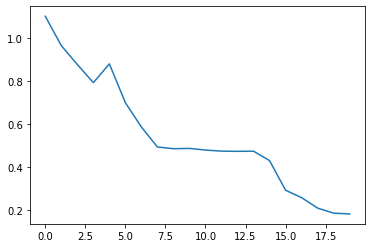

In [ ]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, cost_list)
cost_list

[0.21,
 0.245,
 0.265,
 0.235,
 0.34,
 0.45,
 0.505,
 0.53,
 0.53,
 0.53,
 0.53,
 0.53,
 0.53,
 0.53,
 0.695,
 0.795,
 0.8,
 0.815,
 0.825,
 0.825]

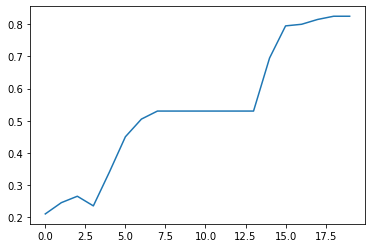

In [ ]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, accuracy_list)
accuracy_list

# Vectorization

reseting the weights and biases so the new approach could be tested

In [53]:
del W1
del W2
del W3
del b1
del b2
del b3
W1 = np.random.normal(0, 1.0, [150, 102])
W2 = np.random.normal(0, 1.0, [60, 150])
W3 = np.random.normal(0, 1.0, [4, 60])
b1 = np.zeros([150,1])
b2 = np.zeros([60,1])
b3 = np.zeros([4,1])

we used only 200 number of the dataset because the lack of speed
but with the new approach we have enough speed to use the whole dataset
now we use the whole dataset

In [54]:
def sigmoid(x) :
  return 1/(1 + np.exp(-x))

learning_rate = 1
epochs_num = 20
batch_size = 10
cost_list = []
accuracy_list = []
for epoch in range(0, epochs_num) :
  np.random.shuffle(train_set)
  batches = np.array_split(train_set, len(train_set)//batch_size)
  cost = 0
  accuracy = 0
  for batch in batches :
    W1_grad = np.zeros([150, 102])
    W2_grad = np.zeros([60, 150])
    W3_grad = np.zeros([4, 60])
    b1_grad = np.zeros([150, 1])
    b2_grad = np.zeros([60, 1])
    b3_grad = np.zeros([4, 1])
    for sample, label in batch :
      a1 = sigmoid(W1 @ sample + b1)
      a2 = sigmoid(W2 @ a1 + b2)
      a3 = sigmoid(W3 @ a2 + b3)
      cost += np.sum(np.power((a3-label),2))
      if (np.argmax(a3) == np.argmax(label)) :
        accuracy += 1

      W3_grad += (2 * (a3 - label) * (a3 * (1 - a3))) @ np.transpose(a2)   

      b3_grad += 2 * (a3 - label) * (a3 * (1 - a3))
      
      a2_grad = np.zeros([W3_grad.shape[1], 1])
      a2_grad = np.transpose(W3) @ (2 * (a3 - label) * (a3 * (1 - a3)))

      W2_grad += (a2_grad * (a2 * (1 - a2))) @ np.transpose(a1)

      b2_grad += a2_grad * (a2 * (1 - a2))
                    
      a1_grad = np.zeros([W2_grad.shape[1], 1])
      a1_grad += np.transpose(W2) @ (a2_grad * (a2 * (1 - a2)))

      W1_grad += (a1_grad * (a1 * (1 - a1))) @ np.transpose(sample)

      b1_grad += a1_grad * (a1 * (1 - a1))
        
    W3 = W3 - (learning_rate * (W3_grad / batch_size))
    W2 = W2 - (learning_rate * (W2_grad / batch_size))
    W1 = W1 - (learning_rate * (W1_grad / batch_size))
        
    b3 = b3 - (learning_rate * (b3_grad / batch_size))
    b2 = b2 - (learning_rate * (b2_grad / batch_size))
    b1 = b1 - (learning_rate * (b1_grad / batch_size))
  cost_list.append(cost / len(train_set))
  accuracy_list.append(accuracy / len(train_set))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


this will take about 14 seconds for 20 epochs and whole of the train set (1962)

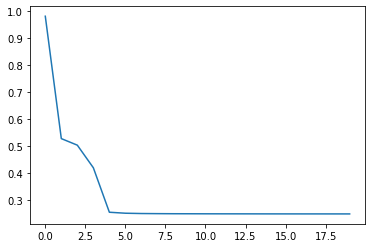

In [55]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, cost_list)

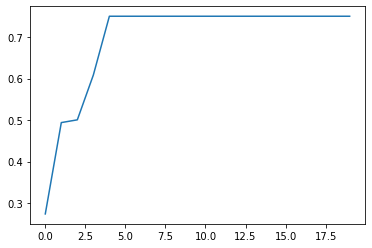

In [56]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, accuracy_list)


# Testing

In [ ]:
cost = 0
accuracy = 0
for sample, label in test_set :
      a1 = sigmoid(W1 @ sample + b1)
      a2 = sigmoid(W2 @ a1 + b2)
      a3 = sigmoid(W3 @ a2 + b3)
      cost += np.sum(np.power((a3-label),2))
      if (np.argmax(a3) == np.argmax(label)) :
        accuracy += 1
print(cost / len(test_set))
print(accuracy / len(test_set))

0.002700232935005279
1.0


In [ ]:
a3

array([[0.98755414],
       [0.00452394],
       [0.03010565],
       [0.00659205]])

### testing other epoch numbers, batch sizes and learning rates
the actual test was for 20 epochs and batch_size of 10 and learning rate of 1

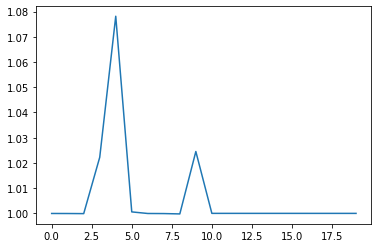

In [23]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, cost_list_l2_e20_b20)

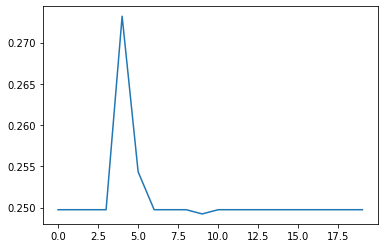

In [14]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, accuracy_list_l2_e20_b20)

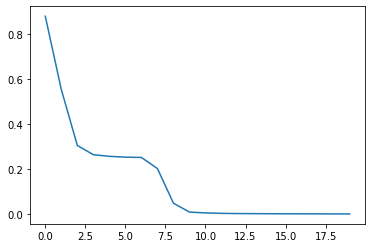

In [24]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, cost_list_l1_e20_b20)

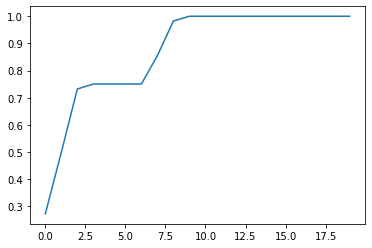

In [25]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, accuracy_list_l1_e20_b20)

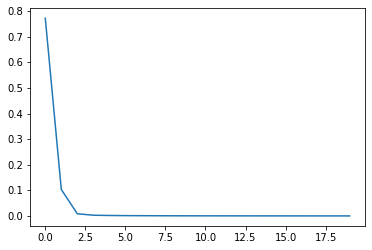

In [32]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, cost_list_l1_e20_b10)

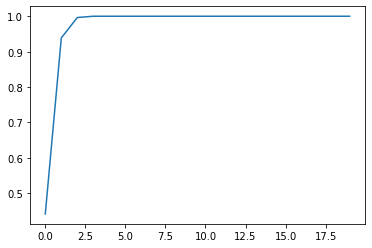

In [33]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, accuracy_list_l1_e20_b10)

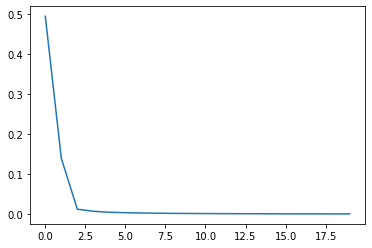

In [38]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, cost_list_l05_e20_b10)

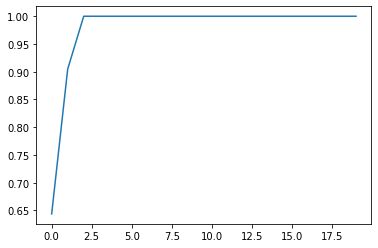

In [39]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, accuracy_list_l05_e20_b10)

as we see reducing batch size and learning_rate could increase accuracy

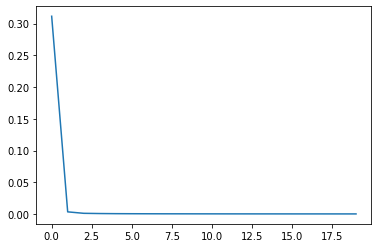

In [42]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, cost_list_l05_e20_b2)

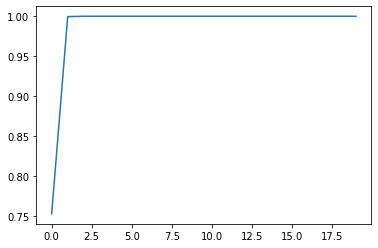

In [43]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, accuracy_list_l05_e20_b2)

# improving gradinet decent
we know that there is a probability of the search progress bounce around the minimum and that may lead the search progress to go uphill sometimes instead of going downhill and that may make the progress slower and take longer.
as you can see the cost reduction is faster than the previous approach.
what is done here is using the history of gradient for using the new one. as you can see in the formula there is a parameter named momentom which causes that only 0.25 (in this example, but it could be a number from 0 to 1) of the gradient affects and the other 0.75 is the effect of the history of gradient.

In [69]:
del W1
del W2
del W3
del b1
del b2
del b3
W1 = np.random.normal(0, 1.0, [150, 102])
W2 = np.random.normal(0, 1.0, [60, 150])
W3 = np.random.normal(0, 1.0, [4, 60])
b1 = np.zeros([150,1])
b2 = np.zeros([60,1])
b3 = np.zeros([4,1])

In [70]:
def sigmoid(x) :
  return 1/(1 + np.exp(-x))

learning_rate = 1
epochs_num = 20
batch_size = 10
cost_list = []
accuracy_list = []
momentom = 0.75
VdW1 = np.zeros([150, 102])
VdW2 = np.zeros([60, 150])
VdW3 = np.zeros([4, 60])
Vdb1 = np.zeros([150, 1])
Vdb2 = np.zeros([60, 1])
Vdb3 = np.zeros([4, 1])
for epoch in range(0, epochs_num) :
  np.random.shuffle(train_set)
  batches = np.array_split(train_set, len(train_set)//batch_size)
  cost = 0
  accuracy = 0
  for batch in batches :
    W1_grad = np.zeros([150, 102])
    W2_grad = np.zeros([60, 150])
    W3_grad = np.zeros([4, 60])
    b1_grad = np.zeros([150, 1])
    b2_grad = np.zeros([60, 1])
    b3_grad = np.zeros([4, 1])
    for sample, label in batch :
      a1 = sigmoid(W1 @ sample + b1)
      a2 = sigmoid(W2 @ a1 + b2)
      a3 = sigmoid(W3 @ a2 + b3)
      cost += np.sum(np.power((a3-label),2))
      if (np.argmax(a3) == np.argmax(label)) :
        accuracy += 1

      W3_grad += (2 * (a3 - label) * (a3 * (1 - a3))) @ np.transpose(a2)   

      b3_grad += 2 * (a3 - label) * (a3 * (1 - a3))
      
      a2_grad = np.zeros([W3_grad.shape[1], 1])
      a2_grad = np.transpose(W3) @ (2 * (a3 - label) * (a3 * (1 - a3)))

      W2_grad += (a2_grad * (a2 * (1 - a2))) @ np.transpose(a1)

      b2_grad += a2_grad * (a2 * (1 - a2))
                    
      a1_grad = np.zeros([W2_grad.shape[1], 1])
      a1_grad += np.transpose(W2) @ (a2_grad * (a2 * (1 - a2)))

      W1_grad += (a1_grad * (a1 * (1 - a1))) @ np.transpose(sample)

      b1_grad += a1_grad * (a1 * (1 - a1))
        
    VdW3 = VdW3 * momentom + (1 - momentom) * (W3_grad / batch_size)
    W3 = W3 - (learning_rate * VdW3)
    VdW2 = VdW2 * momentom + (1 - momentom) * (W2_grad / batch_size)
    W2 = W2 - (learning_rate * VdW2)
    VdW1= VdW1 * momentom + (1 - momentom) * (W1_grad / batch_size)
    W1 = W1 - (learning_rate * VdW1)
    
    Vdb3 = Vdb3 * momentom + (1 - momentom) * (b3_grad / batch_size)  
    b3 = b3 - (learning_rate * Vdb3)
    Vdb2 = Vdb2 * momentom + (1 - momentom) * (b2_grad / batch_size)
    b2 = b2 - (learning_rate * Vdb2)
    Vdb1= Vdb1 * momentom + (1 - momentom) * (b1_grad / batch_size)
    b1 = b1 - (learning_rate * Vdb1)

  cost_list.append(cost / len(train_set))
  accuracy_list.append(accuracy / len(train_set))

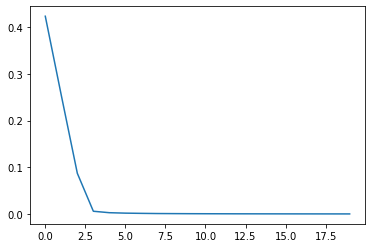

In [71]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, cost_list)

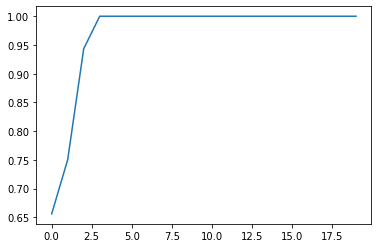

In [72]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, accuracy_list)

# adding new dataset


###Feature_Extraction code for Training data

import numpy
import skimage.io, skimage.color, skimage.feature
import os
import pickle

fruits = ["apple", "lemon", "mango", "raspberry", "Dates", "Banana"]
dataset_features = numpy.zeros(shape=(2942, 360))
outputs = numpy.zeros(shape=2942)

idx = 0
class_label = 0
for fruit_dir in fruits:
    curr_dir = os.path.join(os.path.sep + "Datasets/Fruits-360/Train", fruit_dir)
    all_imgs = os.listdir(os.getcwd()+curr_dir)
    for img_file in all_imgs:
        if img_file.endswith(".jpg"): # Ensures reading only JPG files.
            fruit_data = skimage.io.imread(fname=os.path.sep.join([os.getcwd(), curr_dir, img_file]), as_gray=False)
            fruit_data_hsv = skimage.color.rgb2hsv(rgb=fruit_data)
            hist = numpy.histogram(a=fruit_data_hsv[:, :, 0], bins=360)
            dataset_features[idx, :] = hist[0]
            outputs[idx] = class_label
            idx = idx + 1
    class_label = class_label + 1

with open("Datasets/train_set_features_new.pkl", "wb") as f:
    pickle.dump(dataset_features, f)

with open("Datasets/train_set_labels_new.pkl", "wb") as f:
    pickle.dump(outputs, f)


###Feature_Extraction code for Testing data

import numpy
import skimage.io, skimage.color, skimage.feature
import os
import pickle

fruits = ["apple", "lemon", "mango", "raspberry", "Dates", "Banana"]
dataset_features = numpy.zeros(shape=(994, 360))
outputs = numpy.zeros(shape=994)

idx = 0
class_label = 0
for fruit_dir in fruits:
    curr_dir = os.path.join(os.path.sep + "Datasets/Fruits-360/Test", fruit_dir)
    all_imgs = os.listdir(os.getcwd()+curr_dir)
    for img_file in all_imgs:
        if img_file.endswith(".jpg"): # Ensures reading only JPG files.
            fruit_data = skimage.io.imread(fname=os.path.sep.join([os.getcwd(), curr_dir , img_file]), as_gray=False)
            fruit_data_hsv = skimage.color.rgb2hsv(rgb=fruit_data)
            hist = numpy.histogram(a=fruit_data_hsv[:, :, 0], bins=360)
            dataset_features[idx, :] = hist[0]
            outputs[idx] = class_label
            idx = idx + 1
    class_label = class_label + 1

with open("Datasets/test_set_features_new.pkl", "wb") as f:
    pickle.dump(dataset_features, f)

with open("Datasets/test_set_labels_new.pkl", "wb") as f:
    pickle.dump(outputs, f)


In [73]:

# loading training set features
f = open("Datasets/train_set_features_new.pkl", "rb")
train_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length 
features_STDs = np.std(a=train_set_features2, axis=0)
train_set_features = train_set_features2[:, features_STDs > 52.1]

# changing the range of data between 0 and 1
train_set_features = np.divide(train_set_features, train_set_features.max())

# loading training set labels
f = open("Datasets/train_set_labels_new.pkl", "rb")
train_set_labels = pickle.load(f)
f.close()

# ------------
# loading test set features
f = open("Datasets/test_set_features_new.pkl", "rb")
test_set_features2 = pickle.load(f)
f.close()

# reducing feature vector length 
features_STDs = np.std(a=test_set_features2, axis=0)
test_set_features = test_set_features2[:, features_STDs > 48.5]

# changing the range of data between 0 and 1
test_set_features = np.divide(test_set_features, test_set_features.max())

# loading test set labels
f = open("Datasets/test_set_labels_new.pkl", "rb")
test_set_labels = pickle.load(f)
f.close()

# ------------
# preparing our training and test sets - joining datasets and lables
train_set_new = []
test_set_new = []

for i in range(len(train_set_features)):
    label = np.array([0, 0, 0, 0, 0, 0])
    label[int(train_set_labels[i])] = 1
    label = label.reshape(6,1)
    train_set_new.append((train_set_features[i].reshape(102, 1), label))
    

for i in range(len(test_set_features)):
    label = np.array([0, 0, 0, 0, 0, 0])
    label[int(test_set_labels[i])] = 1
    label = label.reshape(6,1)
    test_set_new.append((test_set_features[i].reshape(102, 1), label))

# shuffle
random.shuffle(train_set_new)
random.shuffle(test_set_new)

# print size
print(len(train_set_new)) #1962
print(len(test_set_new)) #662

2942
994


In [74]:
train_set_new = np.array(train_set_new)
test_set_new = np.array(test_set_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [75]:
del W1
del W2
del W3
del b1
del b2
del b3
W1 = np.random.normal(0, 1.0, [150, 102])
W2 = np.random.normal(0, 1.0, [60, 150])
W3 = np.random.normal(0, 1.0, [6, 60])
b1 = np.zeros([150,1])
b2 = np.zeros([60,1])
b3 = np.zeros([6,1])

In [76]:
def sigmoid(x) :
  return 1/(1 + np.exp(-x))

learning_rate = 1
epochs_num = 20
batch_size = 10
cost_list = []
accuracy_list = []
momentom = 0.75
VdW1 = np.zeros([150, 102])
VdW2 = np.zeros([60, 150])
VdW3 = np.zeros([6, 60])
Vdb1 = np.zeros([150, 1])
Vdb2 = np.zeros([60, 1])
Vdb3 = np.zeros([6, 1])
for epoch in range(0, epochs_num) :
  np.random.shuffle(train_set_new)
  batches = np.array_split(train_set_new, len(train_set_new)//batch_size)
  cost = 0
  accuracy = 0
  for batch in batches :
    W1_grad = np.zeros([150, 102])
    W2_grad = np.zeros([60, 150])
    W3_grad = np.zeros([6, 60])
    b1_grad = np.zeros([150, 1])
    b2_grad = np.zeros([60, 1])
    b3_grad = np.zeros([6, 1])
    for sample, label in batch :
      a1 = sigmoid(W1 @ sample + b1)
      a2 = sigmoid(W2 @ a1 + b2)
      a3 = sigmoid(W3 @ a2 + b3)
      cost += np.sum(np.power((a3-label),2))
      if (np.argmax(a3) == np.argmax(label)) :
        accuracy += 1

      W3_grad += (2 * (a3 - label) * (a3 * (1 - a3))) @ np.transpose(a2)   

      b3_grad += 2 * (a3 - label) * (a3 * (1 - a3))
      
      a2_grad = np.zeros([W3_grad.shape[1], 1])
      a2_grad = np.transpose(W3) @ (2 * (a3 - label) * (a3 * (1 - a3)))

      W2_grad += (a2_grad * (a2 * (1 - a2))) @ np.transpose(a1)

      b2_grad += a2_grad * (a2 * (1 - a2))
                    
      a1_grad = np.zeros([W2_grad.shape[1], 1])
      a1_grad += np.transpose(W2) @ (a2_grad * (a2 * (1 - a2)))

      W1_grad += (a1_grad * (a1 * (1 - a1))) @ np.transpose(sample)

      b1_grad += a1_grad * (a1 * (1 - a1))
        
    VdW3 = VdW3 * momentom + (1 - momentom) * (W3_grad / batch_size)
    W3 = W3 - (learning_rate * VdW3)
    VdW2 = VdW2 * momentom + (1 - momentom) * (W2_grad / batch_size)
    W2 = W2 - (learning_rate * VdW2)
    VdW1= VdW1 * momentom + (1 - momentom) * (W1_grad / batch_size)
    W1 = W1 - (learning_rate * VdW1)
    
    Vdb3 = Vdb3 * momentom + (1 - momentom) * (b3_grad / batch_size)  
    b3 = b3 - (learning_rate * Vdb3)
    Vdb2 = Vdb2 * momentom + (1 - momentom) * (b2_grad / batch_size)
    b2 = b2 - (learning_rate * Vdb2)
    Vdb1= Vdb1 * momentom + (1 - momentom) * (b1_grad / batch_size)
    b1 = b1 - (learning_rate * Vdb1)

  cost_list.append(cost / len(train_set_new))
  accuracy_list.append(accuracy / len(train_set_new))

In [77]:
a3

array([[2.41087589e-02],
       [2.56747719e-04],
       [4.31963290e-02],
       [4.20655584e-06],
       [8.51123954e-01],
       [1.86418226e-05]])

# changing the last layer activation function to softmax

In [78]:
del W1
del W2
del W3
del b1
del b2
del b3
W1 = np.random.normal(0, 1.0, [150, 102])
W2 = np.random.normal(0, 1.0, [60, 150])
W3 = np.random.normal(0, 1.0, [6, 60])
b1 = np.zeros([150,1])
b2 = np.zeros([60,1])
b3 = np.zeros([6,1])

In [79]:
def softmax(vector):
  e = np.exp(vector)
  return e / e.sum()

def sigmoid(x) :
  return 1/(1 + np.exp(-x))

learning_rate = 1
epochs_num = 20
batch_size = 10
cost_list = []
accuracy_list = []
momentom = 0.75
VdW1 = np.zeros([150, 102])
VdW2 = np.zeros([60, 150])
VdW3 = np.zeros([6, 60])
Vdb1 = np.zeros([150, 1])
Vdb2 = np.zeros([60, 1])
Vdb3 = np.zeros([6, 1])
for epoch in range(0, epochs_num) :
  np.random.shuffle(train_set_new)
  batches = np.array_split(train_set_new, len(train_set_new)//batch_size)
  cost = 0
  accuracy = 0
  for batch in batches :
    W1_grad = np.zeros([150, 102])
    W2_grad = np.zeros([60, 150])
    W3_grad = np.zeros([6, 60])
    b1_grad = np.zeros([150, 1])
    b2_grad = np.zeros([60, 1])
    b3_grad = np.zeros([6, 1])
    for sample, label in batch :
      a1 = sigmoid(W1 @ sample + b1)
      a2 = sigmoid(W2 @ a1 + b2)
      a3 = softmax(W3 @ a2 + b3)
      cost += np.sum(np.power((a3-label),2))
      if (np.argmax(a3) == np.argmax(label)) :
        accuracy += 1

      W3_grad += (2 * (a3 - label) * (a3 * (1 - a3))) @ np.transpose(a2)   

      b3_grad += 2 * (a3 - label) * (a3 * (1 - a3))
      
      a2_grad = np.zeros([W3_grad.shape[1], 1])
      a2_grad = np.transpose(W3) @ (2 * (a3 - label) * (a3 * (1 - a3)))

      W2_grad += (a2_grad * (a2 * (1 - a2))) @ np.transpose(a1)

      b2_grad += a2_grad * (a2 * (1 - a2))
                    
      a1_grad = np.zeros([W2_grad.shape[1], 1])
      a1_grad += np.transpose(W2) @ (a2_grad * (a2 * (1 - a2)))

      W1_grad += (a1_grad * (a1 * (1 - a1))) @ np.transpose(sample)

      b1_grad += a1_grad * (a1 * (1 - a1))
        
    VdW3 = VdW3 * momentom + (1 - momentom) * (W3_grad / batch_size)
    W3 = W3 - (learning_rate * VdW3)
    VdW2 = VdW2 * momentom + (1 - momentom) * (W2_grad / batch_size)
    W2 = W2 - (learning_rate * VdW2)
    VdW1= VdW1 * momentom + (1 - momentom) * (W1_grad / batch_size)
    W1 = W1 - (learning_rate * VdW1)
    
    Vdb3 = Vdb3 * momentom + (1 - momentom) * (b3_grad / batch_size)  
    b3 = b3 - (learning_rate * Vdb3)
    Vdb2 = Vdb2 * momentom + (1 - momentom) * (b2_grad / batch_size)
    b2 = b2 - (learning_rate * Vdb2)
    Vdb1= Vdb1 * momentom + (1 - momentom) * (b1_grad / batch_size)
    b1 = b1 - (learning_rate * Vdb1)

  cost_list.append(cost / len(train_set_new))
  accuracy_list.append(accuracy / len(train_set_new))

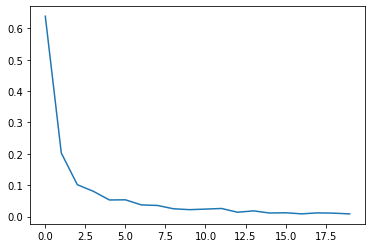

In [80]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, cost_list)

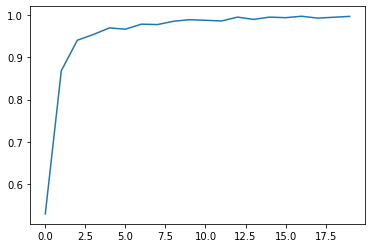

In [81]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, accuracy_list)

In [82]:
a3

array([[5.21671004e-03],
       [5.19964434e-03],
       [3.69084825e-02],
       [3.29026469e-02],
       [9.19771982e-01],
       [5.34395843e-07]])